In [ ]:
import pandas as pd
import os

def adjust_time(df):
    reference_time = df.iloc[0]['Time(ms)']
    df['Time(ms)'] = df['Time(ms)'] - reference_time
    return df

directory = '/content/'
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        df = adjust_time(df)
        new_filename = os.path.splitext(filename)[0] + '_new.csv'
        new_file_path = os.path.join(directory, new_filename)
        df.to_csv(new_file_path, index=False)
        print(f"New file saved as: {new_file_path}")


New file saved as: /content/11-04-24_new.csv
New file saved as: /content/1-03-24_new.csv
New file saved as: /content/Bonhomia_9-03-24_new.csv


In [ ]:
import pandas as pd
file_paths = ["/content/1-03-24_new.csv", "/content/11-04-24_new.csv", "/content/Bonhomia_9-03-24_new.csv"]
datasets = [pd.read_csv(file) for file in file_paths]
for i, dataset in enumerate(datasets):
    print(f"Summary statistics for Dataset {i+1}:")
    print(dataset.describe())
    print()


Summary statistics for Dataset 1:
           Time(ms)  Temperature(C)  Acceleration-X(g)  Acceleration-Y(g)  \
count  2.396000e+03     2396.000000        2396.000000        2396.000000   
mean   1.799951e+06       32.069144           1.302972           0.498406   
std    1.039845e+06        0.302508           0.411772           0.311326   
min    0.000000e+00       31.620000          -1.220000          -1.450000   
25%    8.999872e+05       31.810000           1.060000           0.310000   
50%    1.799948e+06       32.060000           1.290000           0.470000   
75%    2.699920e+06       32.310000           1.530000           0.670000   
max    3.599881e+06       32.690000           3.800000           3.020000   

       Acceleration-Z(g)  
count        2396.000000  
mean           11.339528  
std             0.642204  
min             8.590000  
25%            10.870000  
50%            11.340000  
75%            11.810000  
max            13.650000  

Summary statistics for Datas

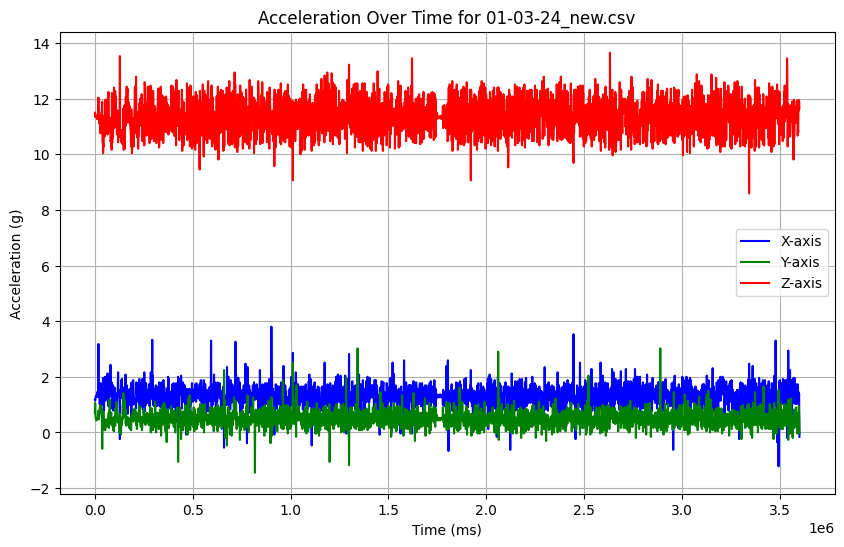

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/1-03-24_new.csv"
df = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
plt.plot(df['Time(ms)'], df['Acceleration-X(g)'], label='X-axis', color='blue')
plt.plot(df['Time(ms)'], df['Acceleration-Y(g)'], label='Y-axis', color='green')
plt.plot(df['Time(ms)'], df['Acceleration-Z(g)'], label='Z-axis', color='red')
plt.title('Acceleration Over Time for 01-03-24_new.csv')
plt.xlabel('Time (ms)')
plt.ylabel('Acceleration (g)')
plt.legend()
plt.grid(True)
plt.show()


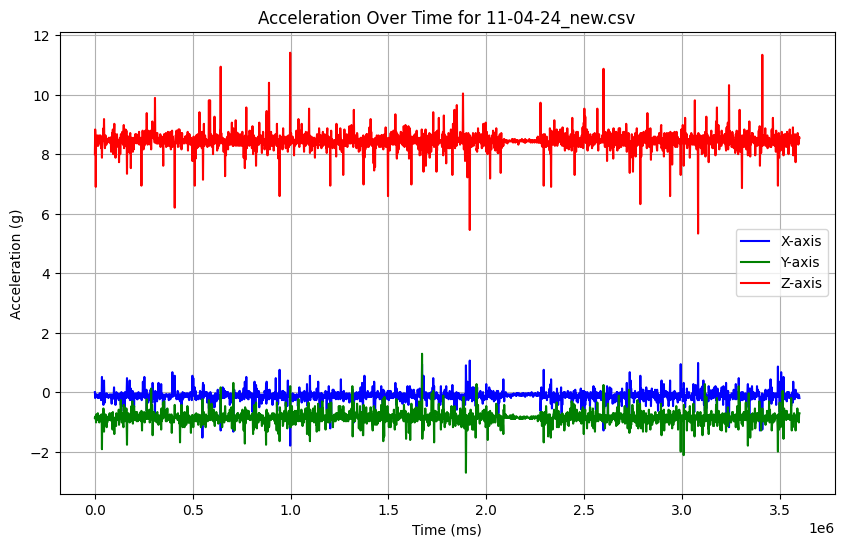

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/11-04-24_new.csv"
df = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
plt.plot(df['Time(ms)'], df['Acceleration-X(g)'], label='X-axis', color='blue')
plt.plot(df['Time(ms)'], df['Acceleration-Y(g)'], label='Y-axis', color='green')
plt.plot(df['Time(ms)'], df['Acceleration-Z(g)'], label='Z-axis', color='red')
plt.title('Acceleration Over Time for 11-04-24_new.csv')
plt.xlabel('Time (ms)')
plt.ylabel('Acceleration (g)')
plt.legend()
plt.grid(True)
plt.show()


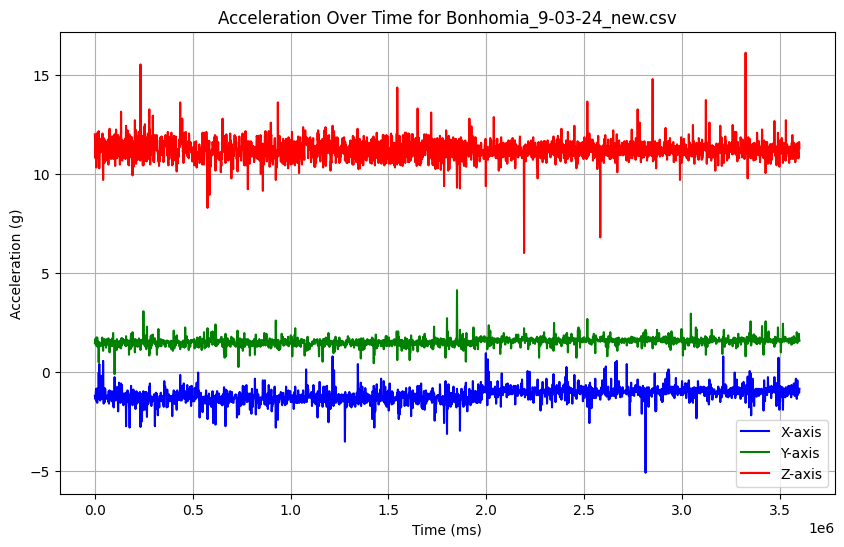

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/Bonhomia_9-03-24_new.csv'
df = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
plt.plot(df['Time(ms)'], df['Acceleration-X(g)'], label='X-axis', color='blue')
plt.plot(df['Time(ms)'], df['Acceleration-Y(g)'], label='Y-axis', color='green')
plt.plot(df['Time(ms)'], df['Acceleration-Z(g)'], label='Z-axis', color='red')
plt.title('Acceleration Over Time for Bonhomia_9-03-24_new.csv')
plt.xlabel('Time (ms)')
plt.ylabel('Acceleration (g)')
plt.legend()
plt.grid(True)
plt.show()


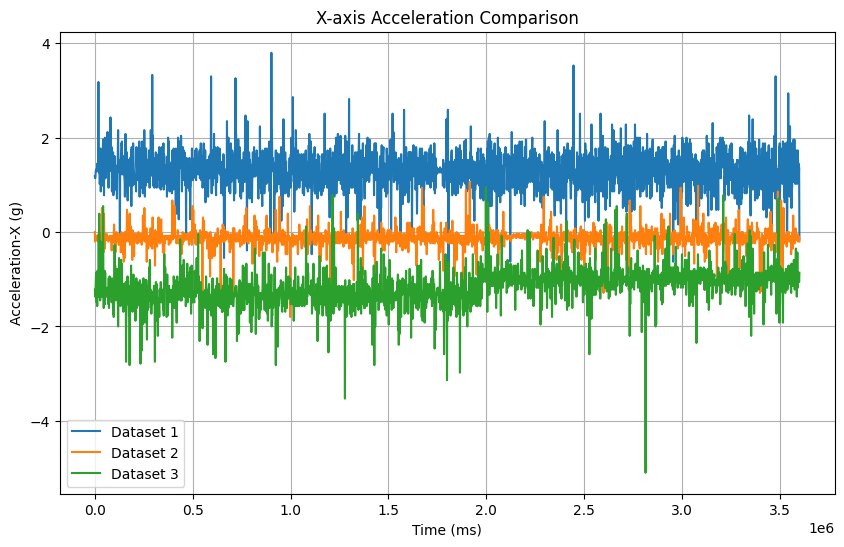

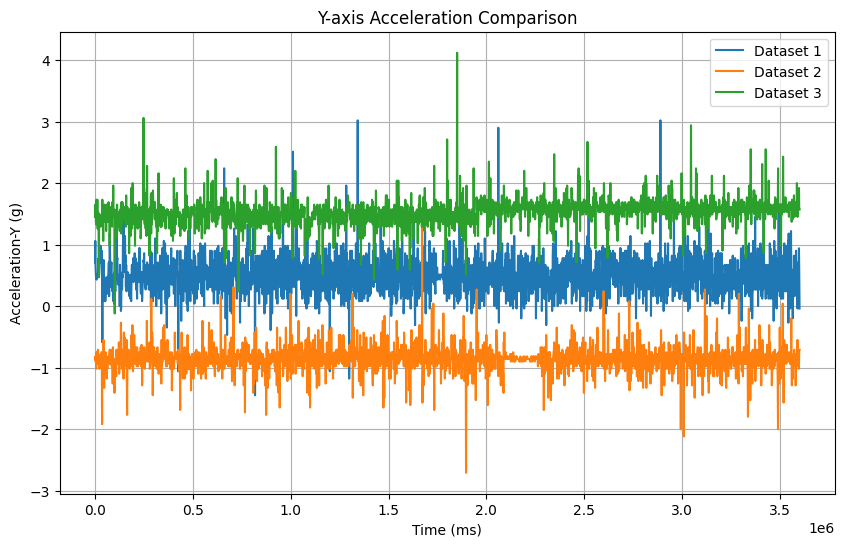

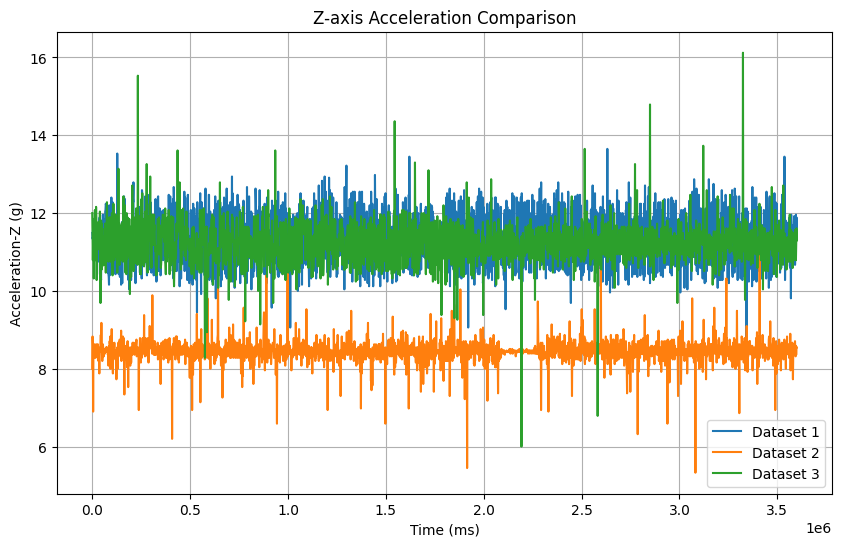

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the adjusted CSV files for all three datasets
file_paths = ["/content/1-03-24_new.csv", "/content/11-04-24_new.csv", "/content/Bonhomia_9-03-24_new.csv"]
datasets = [pd.read_csv(file) for file in file_paths]
plt.figure(figsize=(10, 6))
for i, dataset in enumerate(datasets):
    plt.plot(dataset['Time(ms)'], dataset['Acceleration-X(g)'], label=f'Dataset {i+1}')

plt.title('X-axis Acceleration Comparison')
plt.xlabel('Time (ms)')
plt.ylabel('Acceleration-X (g)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for i, dataset in enumerate(datasets):
    plt.plot(dataset['Time(ms)'], dataset['Acceleration-Y(g)'], label=f'Dataset {i+1}')

plt.title('Y-axis Acceleration Comparison')
plt.xlabel('Time (ms)')
plt.ylabel('Acceleration-Y (g)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for i, dataset in enumerate(datasets):
    plt.plot(dataset['Time(ms)'], dataset['Acceleration-Z(g)'], label=f'Dataset {i+1}')

plt.title('Z-axis Acceleration Comparison')
plt.xlabel('Time (ms)')
plt.ylabel('Acceleration-Z (g)')
plt.legend()
plt.grid(True)
plt.show()



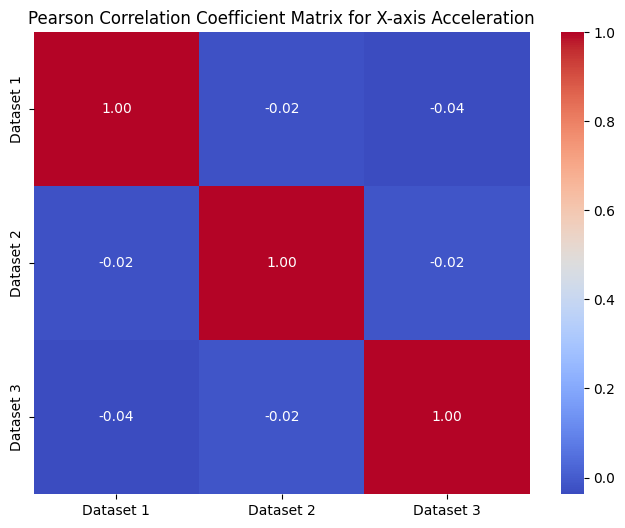

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
file_paths = ["/content/1-03-24_new.csv", "/content/11-04-24_new.csv", "/content/Bonhomia_9-03-24_new.csv"]
datasets = [pd.read_csv(file) for file in file_paths]
correlations = np.zeros((len(datasets), len(datasets)))
for i in range(len(datasets)):
    for j in range(len(datasets)):
        correlations[i, j] = datasets[i]['Acceleration-X(g)'].corr(datasets[j]['Acceleration-X(g)'])
correlation_df = pd.DataFrame(correlations, index=[f'Dataset {i+1}' for i in range(len(datasets))], columns=[f'Dataset {j+1}' for j in range(len(datasets))])
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Coefficient Matrix for X-axis Acceleration')
plt.show()

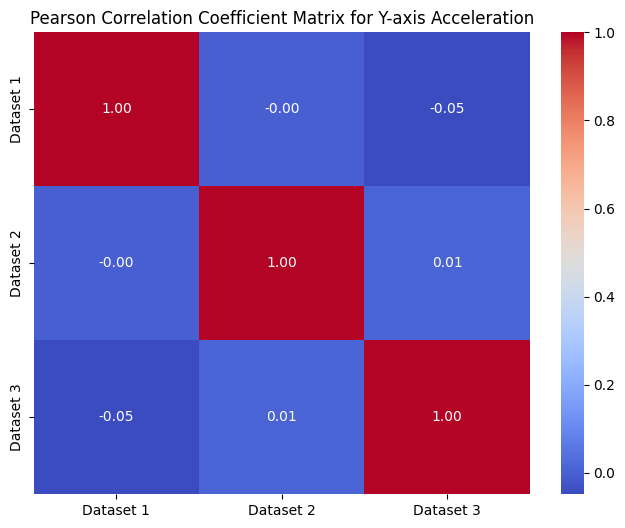

In [ ]:
for i in range(len(datasets)):
    for j in range(len(datasets)):
        correlations[i, j] = datasets[i]['Acceleration-Y(g)'].corr(datasets[j]['Acceleration-Y(g)'])
correlation_df = pd.DataFrame(correlations, index=[f'Dataset {i+1}' for i in range(len(datasets))], columns=[f'Dataset {j+1}' for j in range(len(datasets))])
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Coefficient Matrix for Y-axis Acceleration')
plt.show()


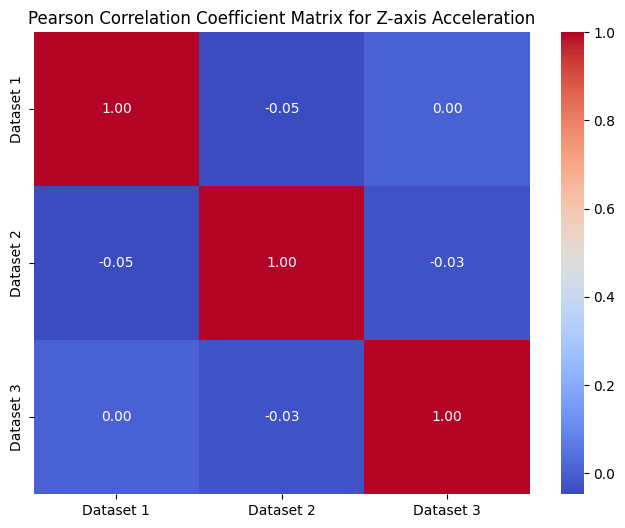

In [ ]:
for i in range(len(datasets)):
    for j in range(len(datasets)):
        correlations[i, j] = datasets[i]['Acceleration-Z(g)'].corr(datasets[j]['Acceleration-Z(g)'])
correlation_df = pd.DataFrame(correlations, index=[f'Dataset {i+1}' for i in range(len(datasets))], columns=[f'Dataset {j+1}' for j in range(len(datasets))])
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Coefficient Matrix for Z-axis Acceleration')
plt.show()

Enter the start row: 0
Enter the end row: 3000


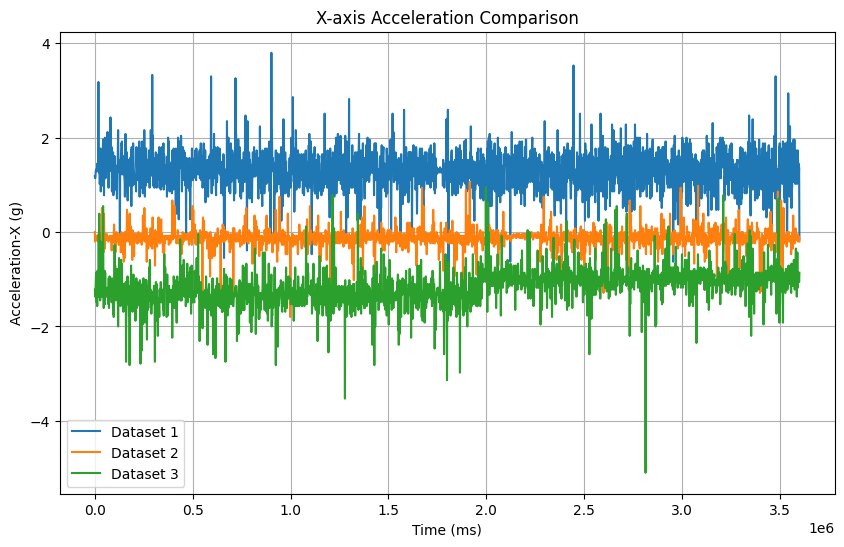

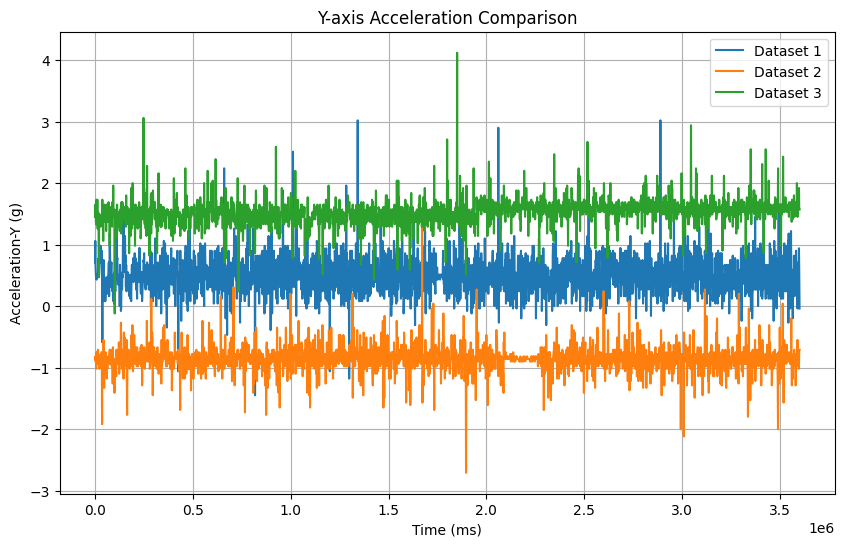

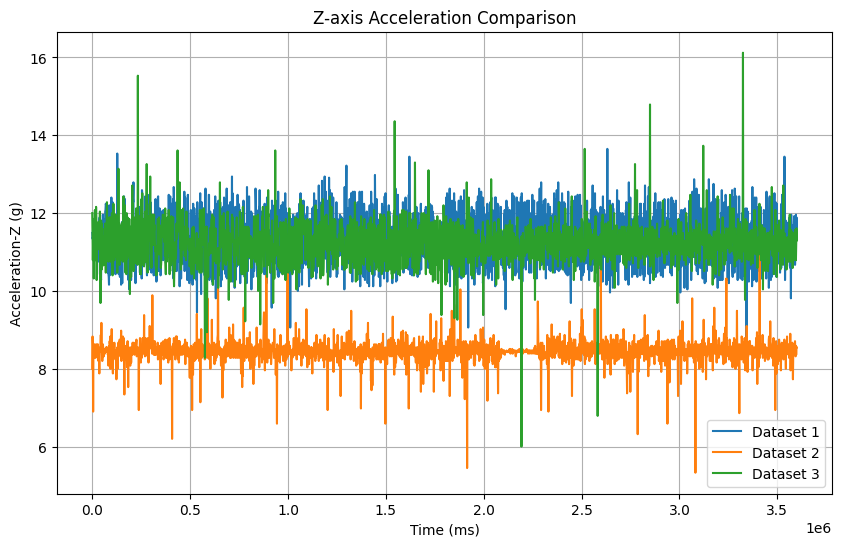

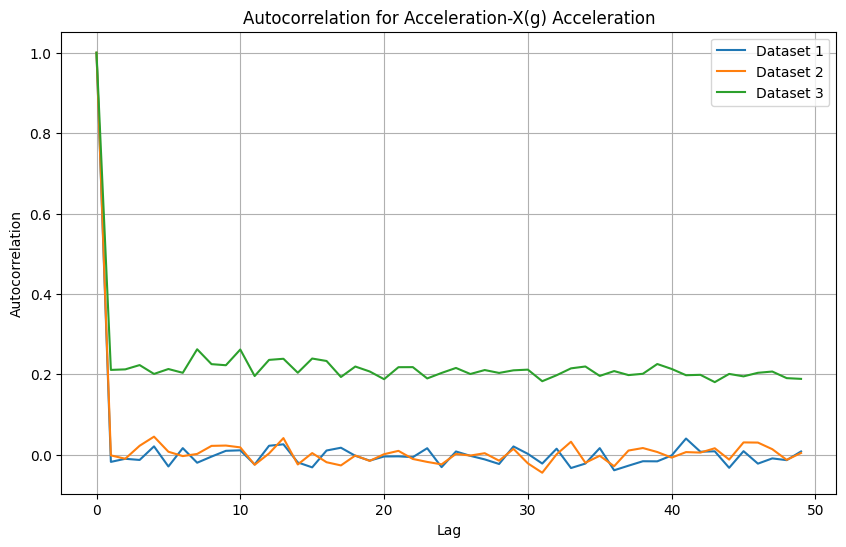

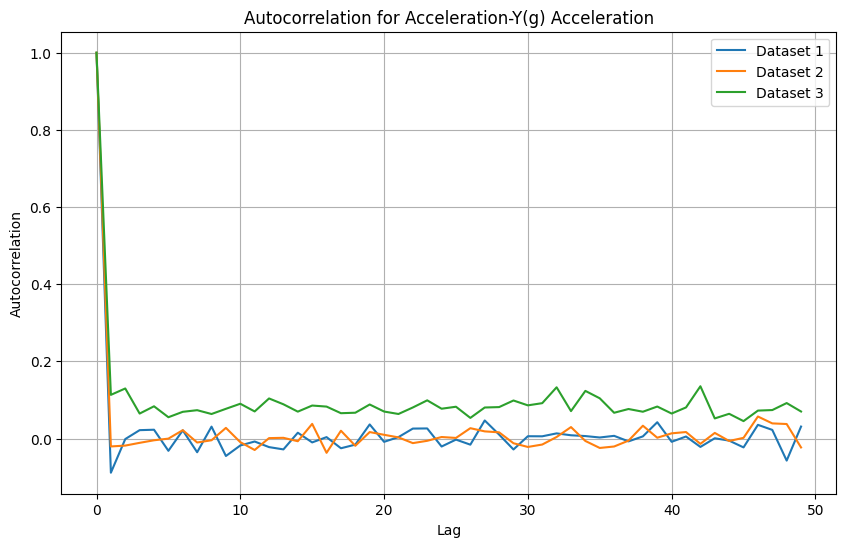

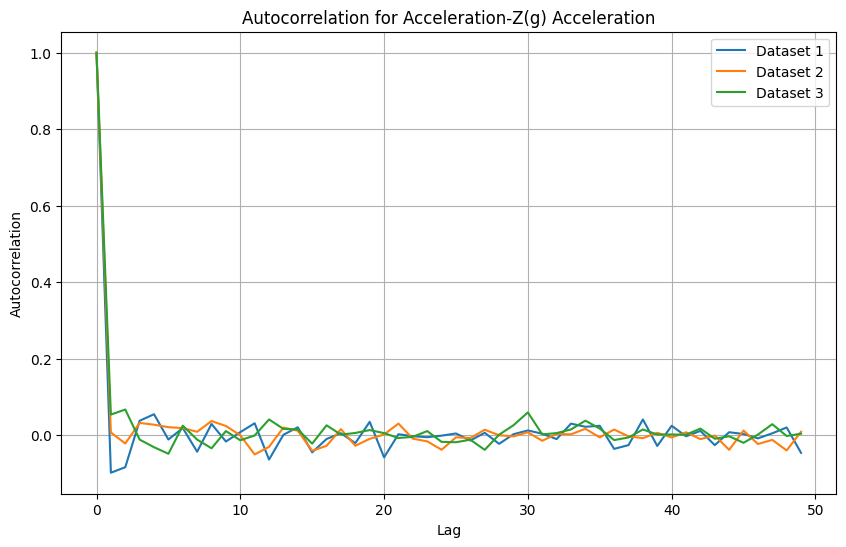

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
def plot_acceleration_data(datasets, start, end):
    plt.figure(figsize=(10, 6))
    for i, dataset in enumerate(datasets):
        plt.plot(dataset['Time(ms)'][start:end], dataset['Acceleration-X(g)'][start:end], label=f'Dataset {i+1}')
    plt.title('X-axis Acceleration Comparison')
    plt.xlabel('Time (ms)')
    plt.ylabel('Acceleration-X (g)')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    for i, dataset in enumerate(datasets):
        plt.plot(dataset['Time(ms)'][start:end], dataset['Acceleration-Y(g)'][start:end], label=f'Dataset {i+1}')
    plt.title('Y-axis Acceleration Comparison')
    plt.xlabel('Time (ms)')
    plt.ylabel('Acceleration-Y (g)')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    for i, dataset in enumerate(datasets):
        plt.plot(dataset['Time(ms)'][start:end], dataset['Acceleration-Z(g)'][start:end], label=f'Dataset {i+1}')
    plt.title('Z-axis Acceleration Comparison')
    plt.xlabel('Time (ms)')
    plt.ylabel('Acceleration-Z (g)')
    plt.legend()
    plt.grid(True)
    plt.show()
file_paths = ["/content/1-03-24_new.csv", "/content/11-04-24_new.csv", "/content/Bonhomia_9-03-24_new.csv"]
datasets = [pd.read_csv(file) for file in file_paths]
start_row = int(input("Enter the start row: "))
end_row = int(input("Enter the end row: "))
plot_acceleration_data(datasets, start_row, end_row)
def plot_autocorrelation_multiple(datasets, labels, axis, lags=50):
    plt.figure(figsize=(10, 6))
    for i, data in enumerate(datasets):
        autocorr = [data[axis].autocorr(lag=lag) for lag in range(lags)]
        plt.plot(range(lags), autocorr, label=labels[i])
    plt.title(f'Autocorrelation for {axis} Acceleration')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.legend()
    plt.grid(True)
    plt.show()

file_paths = ["/content/1-03-24_new.csv", "/content/11-04-24_new.csv", "/content/Bonhomia_9-03-24_new.csv"]
datasets = [pd.read_csv(file) for file in file_paths]




labels = [f'Dataset {i+1}' for i in range(len(datasets))]

# Plot autocorrelation for the X-axis
plot_autocorrelation_multiple(datasets, labels, 'Acceleration-X(g)')

# Similarly, you can plot for Y and Z axes
plot_autocorrelation_multiple(datasets, labels, 'Acceleration-Y(g)')
plot_autocorrelation_multiple(datasets, labels, 'Acceleration-Z(g)')



Enter the start row: 0
Enter the end row: 3000


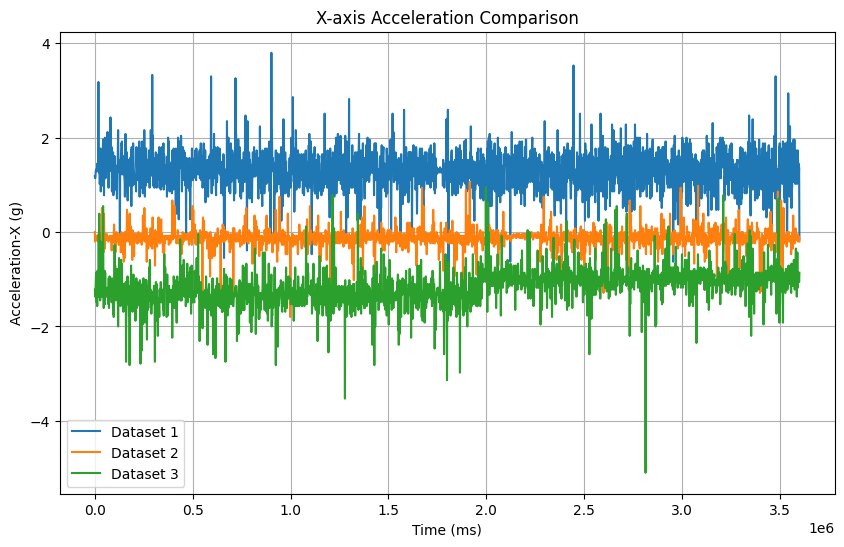

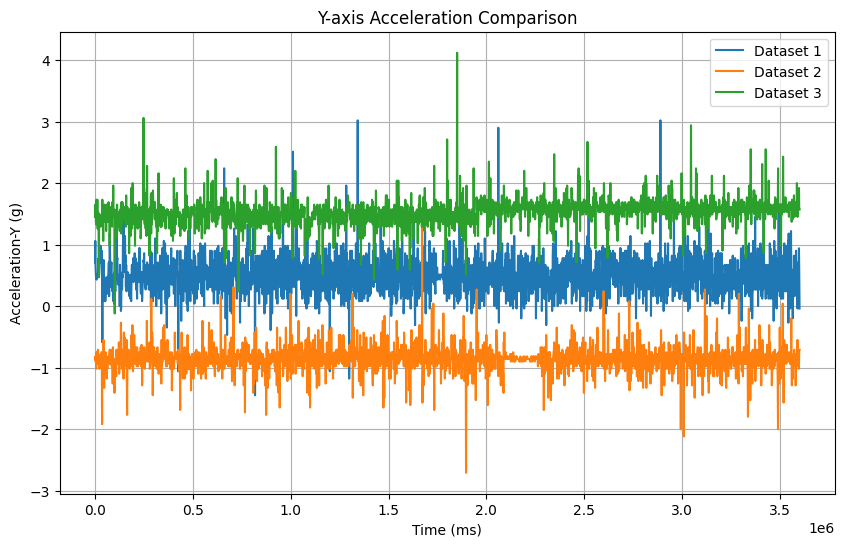

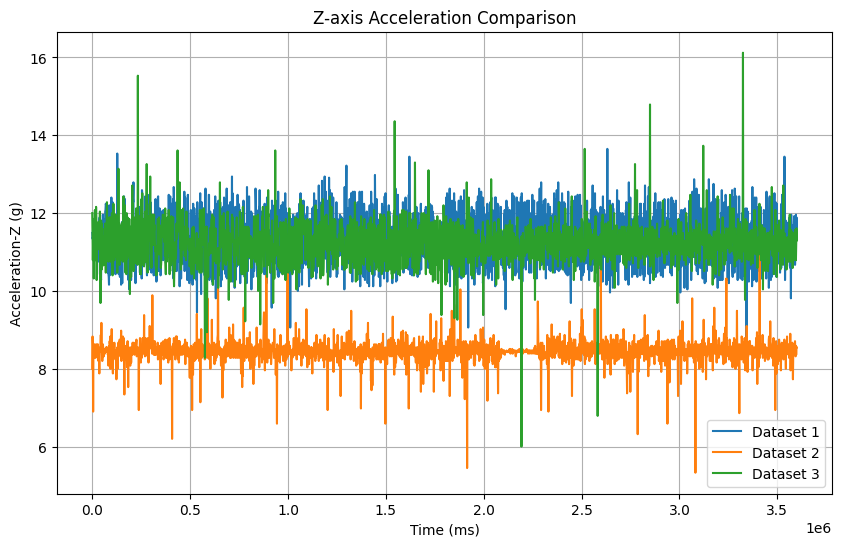

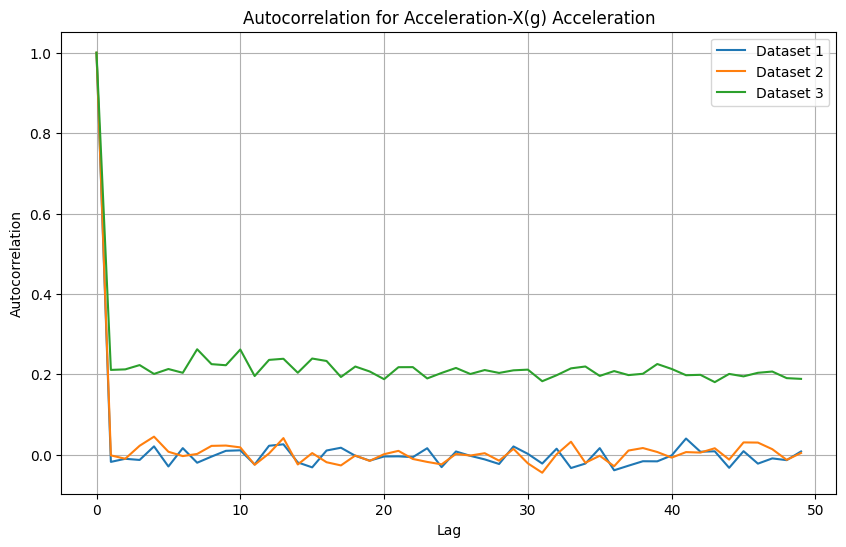

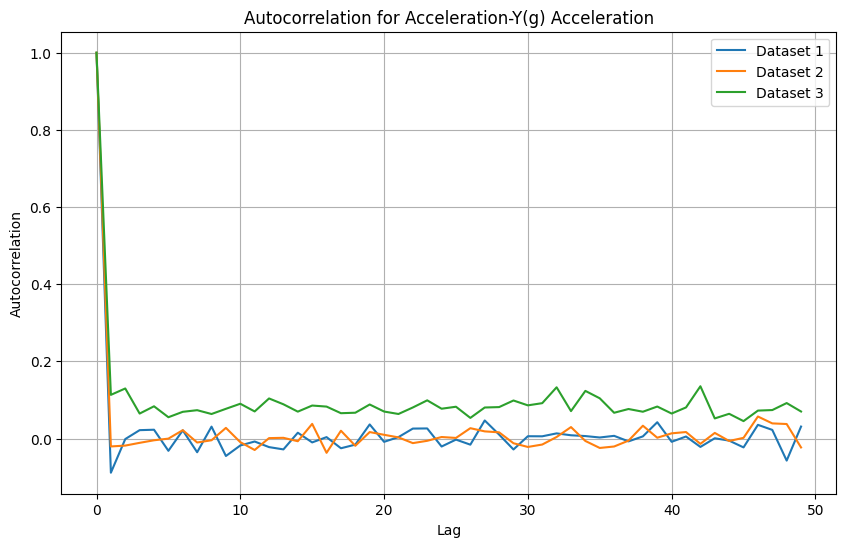

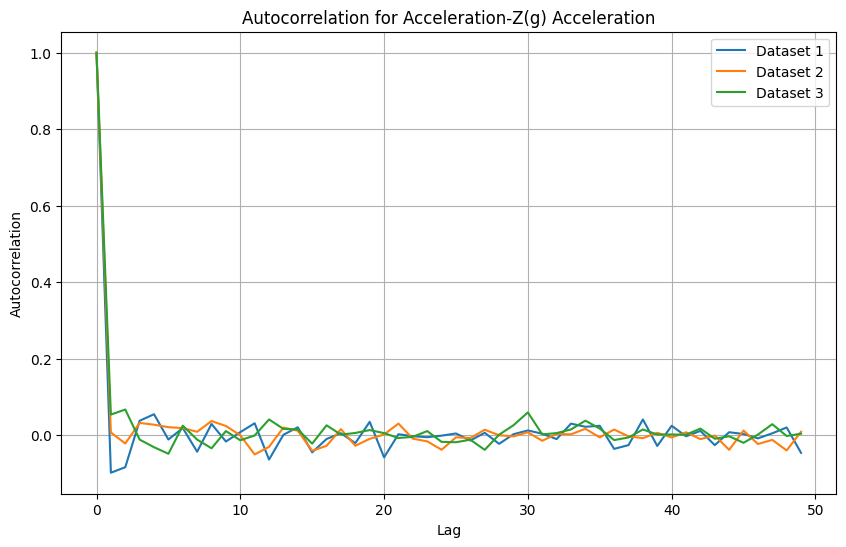

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
def plot_acceleration_data(datasets, start, end):
    plt.figure(figsize=(10, 6))
    for i, dataset in enumerate(datasets):
        plt.plot(dataset['Time(ms)'][start:end], dataset['Acceleration-X(g)'][start:end], label=f'Dataset {i+1}')
    plt.title('X-axis Acceleration Comparison')
    plt.xlabel('Time (ms)')
    plt.ylabel('Acceleration-X (g)')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    for i, dataset in enumerate(datasets):
        plt.plot(dataset['Time(ms)'][start:end], dataset['Acceleration-Y(g)'][start:end], label=f'Dataset {i+1}')
    plt.title('Y-axis Acceleration Comparison')
    plt.xlabel('Time (ms)')
    plt.ylabel('Acceleration-Y (g)')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    for i, dataset in enumerate(datasets):
        plt.plot(dataset['Time(ms)'][start:end], dataset['Acceleration-Z(g)'][start:end], label=f'Dataset {i+1}')
    plt.title('Z-axis Acceleration Comparison')
    plt.xlabel('Time (ms)')
    plt.ylabel('Acceleration-Z (g)')
    plt.legend()
    plt.grid(True)
    plt.show()
file_paths = ["/content/1-03-24_new.csv", "/content/11-04-24_new.csv", "/content/Bonhomia_9-03-24_new.csv"]
datasets = [pd.read_csv(file) for file in file_paths]
start_row = int(input("Enter the start row: "))
end_row = int(input("Enter the end row: "))
plot_acceleration_data(datasets, start_row, end_row)
def plot_autocorrelation_multiple(datasets, labels, axis, lags=50):
    plt.figure(figsize=(10, 6))
    for i, data in enumerate(datasets):
        autocorr = [data[axis].autocorr(lag=lag) for lag in range(lags)]
        plt.plot(range(lags), autocorr, label=labels[i])
    plt.title(f'Autocorrelation for {axis} Acceleration')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.legend()
    plt.grid(True)
    plt.show()

file_paths = ["/content/1-03-24_new.csv", "/content/11-04-24_new.csv", "/content/Bonhomia_9-03-24_new.csv"]
datasets = [pd.read_csv(file) for file in file_paths]
labels = [f'Dataset {i+1}' for i in range(len(datasets))]

# Plot autocorrelation for the X-axis
plot_autocorrelation_multiple(datasets, labels, 'Acceleration-X(g)')

# Similarly, you can plot for Y and Z axes
plot_autocorrelation_multiple(datasets, labels, 'Acceleration-Y(g)')
plot_autocorrelation_multiple(datasets, labels, 'Acceleration-Z(g)')



In [ ]:
import pandas as pd

def calculate_autocorrelation(data, axis, lags=50):
    autocorr_values = [data[axis].autocorr(lag=lag) for lag in range(lags)]
    return autocorr_values

file_paths = ["/content/1-03-24_new.csv", "/content/11-04-24_new.csv", "/content/Bonhomia_9-03-24_new.csv"]
datasets = [pd.read_csv(file) for file in file_paths]
labels = [f'Dataset {i+1}' for i in range(len(datasets))]

# Function to print autocorrelation values
def print_autocorrelation(datasets, labels, axis, lags=50):
    print(f"\nAutocorrelation values for the {axis}:")
    for i, dataset in enumerate(datasets):
        autocorr_values = calculate_autocorrelation(dataset, axis, lags)
        print(f"{labels[i]}: {autocorr_values}")

# Print autocorrelation values for the X-axis
print_autocorrelation(datasets, labels, 'Acceleration-X(g)')

# Print autocorrelation values for the Y-axis
print_autocorrelation(datasets, labels, 'Acceleration-Y(g)')

# Print autocorrelation values for the Z-axis
print_autocorrelation(datasets, labels, 'Acceleration-Z(g)')



Autocorrelation values for the Acceleration-X(g):
Dataset 1: [0.9999999999999999, -0.01783088146719151, -0.010124907987168993, -0.01302129476682763, 0.020790164489607674, -0.02925908127168552, 0.01638718179846959, -0.019931861498647875, -0.0046314014435873, 0.009702713139725991, 0.01093786646641391, -0.024267044051647382, 0.022287862961910328, 0.02587431742828185, -0.019136005951718812, -0.0314488246578941, 0.010468109325361885, 0.017378729230744655, -0.0027010811468161514, -0.014710713447582268, -0.004389952503394707, -0.0040625516568364335, -0.006067314514055154, 0.0161418108702872, -0.03091929914909736, 0.008061544318524506, -0.002784384701150378, -0.011643755786656704, -0.023031560542163813, 0.020576791017010227, 0.0021515746512599096, -0.02196515442624566, 0.014979043511812352, -0.033119575329571896, -0.02203790404398988, 0.016409116408072, -0.03867405652556052, -0.02728727679576621, -0.01622008561120221, -0.016476674923854025, -0.001832692072056284, 0.0402387722943099, 0.0074224

In [ ]:

import pandas as pd
import numpy as np

def calculate_pearson_correlation(datasets, axis):
    correlations = np.zeros((len(datasets), len(datasets)))
    for i in range(len(datasets)):
        for j in range(len(datasets)):
            correlations[i, j] = datasets[i][axis].corr(datasets[j][axis])
    return correlations

file_paths = ["/content/1-03-24_new.csv", "/content/11-04-24_new.csv", "/content/Bonhomia_9-03-24_new.csv"]
datasets = [pd.read_csv(file) for file in file_paths]
labels = [f'Dataset {i+1}' for i in range(len(datasets))]

# Calculate and print Pearson correlation coefficients as percentages for the X-axis
print("Pearson Correlation Percentage Matrix for the X-axis:")
x_corr_matrix = calculate_pearson_correlation(datasets, 'Acceleration-X(g)') * 100
print(pd.DataFrame(x_corr_matrix, index=labels, columns=labels))

# Calculate and print Pearson correlation coefficients as percentages for the Y-axis
print("\nPearson Correlation Percentage Matrix for the Y-axis:")
y_corr_matrix = calculate_pearson_correlation(datasets, 'Acceleration-Y(g)') * 100
print(pd.DataFrame(y_corr_matrix, index=labels, columns=labels))

# Calculate and print Pearson correlation coefficients as percentages for the Z-axis
print("\nPearson Correlation Percentage Matrix for the Z-axis:")
z_corr_matrix = calculate_pearson_correlation(datasets, 'Acceleration-Z(g)') * 100
print(pd.DataFrame(z_corr_matrix, index=labels, columns=labels))


Pearson Correlation Percentage Matrix for the X-axis:
            Dataset 1   Dataset 2   Dataset 3
Dataset 1  100.000000   -2.318944   -3.766881
Dataset 2   -2.318944  100.000000   -1.541615
Dataset 3   -3.766881   -1.541615  100.000000

Pearson Correlation Percentage Matrix for the Y-axis:
            Dataset 1   Dataset 2   Dataset 3
Dataset 1  100.000000   -0.329473   -4.857297
Dataset 2   -0.329473  100.000000    1.226466
Dataset 3   -4.857297    1.226466  100.000000

Pearson Correlation Percentage Matrix for the Z-axis:
            Dataset 1   Dataset 2   Dataset 3
Dataset 1  100.000000   -4.776101    0.221229
Dataset 2   -4.776101  100.000000   -2.991668
Dataset 3    0.221229   -2.991668  100.000000


In [ ]:
import pandas as pd
import numpy as np
file_paths = ["/content/1-03-24_new.csv", "/content/11-04-24_new.csv", "/content/Bonhomia_9-03-24_new.csv"]
datasets = [pd.read_csv(file) for file in file_paths]
labels = [f'Dataset {i+1}' for i in range(len(datasets))]
def calculate_autocorrelation(data, axis, lags=50):
    autocorr_values = [data[axis].autocorr(lag=lag) for lag in range(lags)]
    return autocorr_values
def calculate_autocorrelation_similarity(datasets, axis, lags=50):
    autocorr_values = [calculate_autocorrelation(dataset, axis, lags) for dataset in datasets]
    similarities = np.zeros((len(datasets), len(datasets)))

    for i in range(len(datasets)):
        for j in range(len(datasets)):
            similarities[i, j] = np.corrcoef(autocorr_values[i], autocorr_values[j])[0, 1]

    return similarities

# Calculate and print autocorrelation-based similarity percentages for the X-axis
print("\nAutocorrelation-Based Similarity Percentage Matrix for the X-axis:")
x_auto_similarity_matrix = calculate_autocorrelation_similarity(datasets, 'Acceleration-X(g)') * 100
print(pd.DataFrame(x_auto_similarity_matrix, index=labels, columns=labels))

# Calculate and print autocorrelation-based similarity percentages for the Y-axis
print("\nAutocorrelation-Based Similarity Percentage Matrix for the Y-axis:")
y_auto_similarity_matrix = calculate_autocorrelation_similarity(datasets, 'Acceleration-Y(g)') * 100
print(pd.DataFrame(y_auto_similarity_matrix, index=labels, columns=labels))

# Calculate and print autocorrelation-based similarity percentages for the Z-axis
print("\nAutocorrelation-Based Similarity Percentage Matrix for the Z-axis:")
z_auto_similarity_matrix = calculate_autocorrelation_similarity(datasets, 'Acceleration-Z(g)') * 100
print(pd.DataFrame(z_auto_similarity_matrix, index=labels, columns=labels))



Autocorrelation-Based Similarity Percentage Matrix for the X-axis:
            Dataset 1   Dataset 2   Dataset 3
Dataset 1  100.000000   98.774461   97.928356
Dataset 2   98.774461  100.000000   98.445937
Dataset 3   97.928356   98.445937  100.000000

Autocorrelation-Based Similarity Percentage Matrix for the Y-axis:
            Dataset 1   Dataset 2   Dataset 3
Dataset 1  100.000000   97.548659   96.871406
Dataset 2   97.548659  100.000000   97.275942
Dataset 3   96.871406   97.275942  100.000000

Autocorrelation-Based Similarity Percentage Matrix for the Z-axis:
            Dataset 1   Dataset 2   Dataset 3
Dataset 1  100.000000   97.136873   95.393104
Dataset 2   97.136873  100.000000   97.215219
Dataset 3   95.393104   97.215219  100.000000


In [ ]:
import pandas as pd
import os
from scipy.spatial.distance import cdist
import numpy as np

def adjust_time(df):
    reference_time = df.iloc[0]['Time(ms)']
    df['Time(ms)'] = df['Time(ms)'] - reference_time
    return df

def calculate_dtw_distance(series1, series2):
    distance = cdist(series1[:, np.newaxis], series2[:, np.newaxis], 'euclidean')
    return distance[0][0]

# Provide the paths to your datasets
dataset_paths = [
    "/content/1-03-24_new.csv",
    "/content/11-04-24_new.csv",
    "/content/Bonhomia_9-03-24_new.csv"
]

datasets = []

# Read and adjust time for each dataset
for file_path in dataset_paths:
    df = pd.read_csv(file_path)
    df = adjust_time(df)
    datasets.append(df)

# Compute DTW distance for X, Y, and Z axes separately for all datasets
for axis in ['Acceleration-X(g)', 'Acceleration-Y(g)', 'Acceleration-Z(g)']:
    print(f"DTW Distance for Axis: {axis}")
    for i, dataset1 in enumerate(datasets):
        for j, dataset2 in enumerate(datasets):
            if i != j:
                distance = calculate_dtw_distance(dataset1[axis].values, dataset2[axis].values)
                print(f"Dataset {i+1} vs Dataset {j+1}: {distance}")


DTW Distance for Axis: Acceleration-X(g)
Dataset 1 vs Dataset 2: 1.18
Dataset 1 vs Dataset 3: 2.4
Dataset 2 vs Dataset 1: 1.18
Dataset 2 vs Dataset 3: 1.22
Dataset 3 vs Dataset 1: 2.4
Dataset 3 vs Dataset 2: 1.22
DTW Distance for Axis: Acceleration-Y(g)
Dataset 1 vs Dataset 2: 1.5699999999999998
Dataset 1 vs Dataset 3: 0.74
Dataset 2 vs Dataset 1: 1.5699999999999998
Dataset 2 vs Dataset 3: 2.31
Dataset 3 vs Dataset 1: 0.74
Dataset 3 vs Dataset 2: 2.31
DTW Distance for Axis: Acceleration-Z(g)
Dataset 1 vs Dataset 2: 3.49
Dataset 1 vs Dataset 3: 0.5099999999999998
Dataset 2 vs Dataset 1: 3.49
Dataset 2 vs Dataset 3: 4.0
Dataset 3 vs Dataset 1: 0.5099999999999998
Dataset 3 vs Dataset 2: 4.0


In [ ]:
import pandas as pd
import os
from scipy.spatial.distance import cdist
import numpy as np

def adjust_time(df):
    reference_time = df.iloc[0]['Time(ms)']
    df['Time(ms)'] = df['Time(ms)'] - reference_time
    return df

def calculate_dtw_distance(series1, series2):
    distance = cdist(series1[:, np.newaxis], series2[:, np.newaxis], 'euclidean')
    return distance[0][0]

# Provide the paths to your datasets
dataset_paths = [
    "/content/1-03-24_new.csv",
    "/content/11-04-24_new.csv",
    "/content/Bonhomia_9-03-24_new.csv"
]

datasets = []

# Read and adjust time for each dataset
for file_path in dataset_paths:
    df = pd.read_csv(file_path)
    df = adjust_time(df)
    datasets.append(df)

# Compute DTW distance for X, Y, and Z axes separately for all datasets
for axis in ['Acceleration-X(g)', 'Acceleration-Y(g)', 'Acceleration-Z(g)']:
    print(f"DTW Distance for Axis: {axis}")
    for i, dataset1 in enumerate(datasets):
        for j, dataset2 in enumerate(datasets):
            if i != j:
                distance = calculate_dtw_distance(dataset1[axis].values, dataset2[axis].values)
                similarity_percentage = (1 - (distance / (dataset1[axis].max() - dataset1[axis].min()))) * 100
                print(f"Dataset {i+1} vs Dataset {j+1}: {similarity_percentage:.2f}% similarity")


DTW Distance for Axis: Acceleration-X(g)
Dataset 1 vs Dataset 2: 76.49% similarity
Dataset 1 vs Dataset 3: 52.19% similarity
Dataset 2 vs Dataset 1: 58.74% similarity
Dataset 2 vs Dataset 3: 57.34% similarity
Dataset 3 vs Dataset 1: 60.26% similarity
Dataset 3 vs Dataset 2: 79.80% similarity
DTW Distance for Axis: Acceleration-Y(g)
Dataset 1 vs Dataset 2: 64.88% similarity
Dataset 1 vs Dataset 3: 83.45% similarity
Dataset 2 vs Dataset 1: 60.75% similarity
Dataset 2 vs Dataset 3: 42.25% similarity
Dataset 3 vs Dataset 1: 82.55% similarity
Dataset 3 vs Dataset 2: 45.52% similarity
DTW Distance for Axis: Acceleration-Z(g)
Dataset 1 vs Dataset 2: 31.03% similarity
Dataset 1 vs Dataset 3: 89.92% similarity
Dataset 2 vs Dataset 1: 42.60% similarity
Dataset 2 vs Dataset 3: 34.21% similarity
Dataset 3 vs Dataset 1: 94.96% similarity
Dataset 3 vs Dataset 2: 60.47% similarity


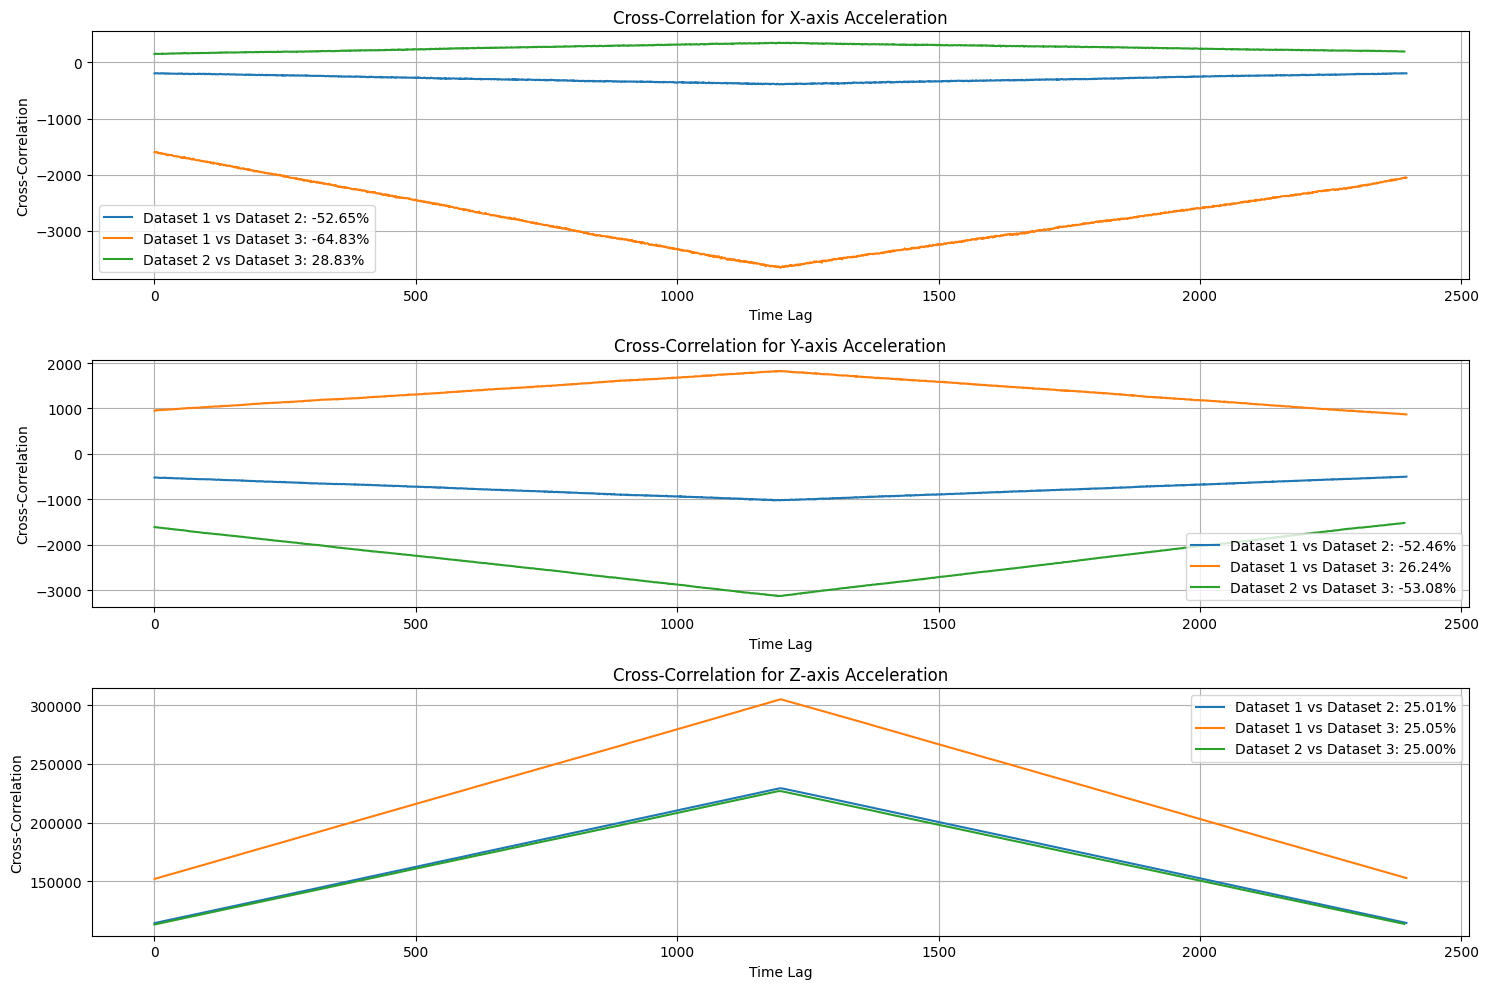

In [ ]:
import matplotlib.pyplot as plt

# Function to calculate cross-correlation similarity percentages
def calculate_cross_correlation_similarity(series1, series2):
    cross_corr = correlate(series1, series2, mode='same')
    max_corr = np.max(cross_corr)
    min_corr = np.min(cross_corr)
    similarity_percentage = (max_corr - min_corr) / (2 * max_corr) * 100
    return similarity_percentage, cross_corr

# Compute cross-correlation and similarity percentages for X, Y, and Z axes
similarity_percentages = {}
cross_correlation_plots = {}

for axis in ['X', 'Y', 'Z']:
    similarity_percentages[axis] = {}
    cross_correlation_plots[axis] = {}
    for i in range(len(datasets)):
        for j in range(i+1, len(datasets)):
            similarity_percentage, cross_corr = calculate_cross_correlation_similarity(datasets[i][f'Acceleration-{axis}(g)'], datasets[j][f'Acceleration-{axis}(g)'])
            similarity_percentages[axis][f'Dataset {i+1} vs Dataset {j+1}'] = similarity_percentage
            cross_correlation_plots[axis][f'Dataset {i+1} vs Dataset {j+1}'] = cross_corr

# Plot cross-correlation and show similarity percentages
plt.figure(figsize=(15, 10))

for i, axis in enumerate(['X', 'Y', 'Z']):
    plt.subplot(3, 1, i+1)
    for key, cross_corr in cross_correlation_plots[axis].items():
        plt.plot(cross_corr, label=f"{key}: {similarity_percentages[axis][key]:.2f}%")
    plt.title(f'Cross-Correlation for {axis}-axis Acceleration')
    plt.xlabel('Time Lag')
    plt.ylabel('Cross-Correlation')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()
